# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


NameError: name 'np' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# test code
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

response_temp = requests.get(query_url + "london").json()

In [33]:
# test code
response_temp

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 285.76,
  'feels_like': 282.76,
  'temp_min': 283.15,
  'temp_max': 287.59,
  'pressure': 1010,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 170},
 'clouds': {'all': 2},
 'dt': 1586138574,
 'sys': {'type': 1,
  'id': 1417,
  'country': 'GB',
  'sunrise': 1586150615,
  'sunset': 1586198500},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [34]:
response_temp["name"]

'London'

In [35]:
# Perform a weather check on each city using a series of successive API calls.
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

# set up lists to hold reponse info
record = 1
set_number = 1
processed_city = []
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Import time so as not to get blocked
import time

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        time.sleep(1)
        processed_city.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} of Set {set_number} | {city}")
        record += 1
        set_number += 1
    except KeyError:
        print(f"City not found | {city}")

print("Done processing...")

Processing Record 1 of Set 1 | carnarvon
City not found | temaraia
City not found | guelengdeng
Processing Record 2 of Set 2 | arraial do cabo
Processing Record 3 of Set 3 | bilibino
Processing Record 4 of Set 4 | provideniya
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 6 | albuquerque
Processing Record 7 of Set 7 | shingu
Processing Record 8 of Set 8 | cap malheureux
Processing Record 9 of Set 9 | longyearbyen
Processing Record 10 of Set 10 | kuala terengganu
Processing Record 11 of Set 11 | palu
Processing Record 12 of Set 12 | te anau
Processing Record 13 of Set 13 | gotsu
Processing Record 14 of Set 14 | voyinka
Processing Record 15 of Set 15 | panzhihua
Processing Record 16 of Set 16 | albany
Processing Record 17 of Set 17 | sayat
Processing Record 18 of Set 18 | belmonte
Processing Record 19 of Set 19 | castro
Processing Record 20 of Set 20 | dingle
Processing Record 21 of Set 21 | ivankiv
Processing Record 22 of Set 22 | hobyo
Processing Record 23 of Set 23 | h

Processing Record 178 of Set 178 | whitehorse
Processing Record 179 of Set 179 | saint-francois
Processing Record 180 of Set 180 | bay roberts
Processing Record 181 of Set 181 | thompson
Processing Record 182 of Set 182 | barra do garcas
Processing Record 183 of Set 183 | sangar
Processing Record 184 of Set 184 | chuy
Processing Record 185 of Set 185 | valle de allende
Processing Record 186 of Set 186 | brae
Processing Record 187 of Set 187 | carballo
Processing Record 188 of Set 188 | sao joao da barra
Processing Record 189 of Set 189 | talnakh
Processing Record 190 of Set 190 | yeppoon
City not found | huazolotitlan
Processing Record 191 of Set 191 | dingolfing
Processing Record 192 of Set 192 | cortona
Processing Record 193 of Set 193 | izumo
City not found | amderma
Processing Record 194 of Set 194 | alofi
Processing Record 195 of Set 195 | port hedland
Processing Record 196 of Set 196 | deputatskiy
Processing Record 197 of Set 197 | ust-tsilma
Processing Record 198 of Set 198 | ku

Processing Record 357 of Set 357 | union
Processing Record 358 of Set 358 | mach
Processing Record 359 of Set 359 | yarada
Processing Record 360 of Set 360 | tucuman
Processing Record 361 of Set 361 | arkansas city
Processing Record 362 of Set 362 | ostrovnoy
Processing Record 363 of Set 363 | faanui
Processing Record 364 of Set 364 | rio grande
City not found | tumannyy
Processing Record 365 of Set 365 | matara
Processing Record 366 of Set 366 | port hardy
Processing Record 367 of Set 367 | dengzhou
Processing Record 368 of Set 368 | mundi
Processing Record 369 of Set 369 | pisco
Processing Record 370 of Set 370 | ulladulla
Processing Record 371 of Set 371 | vredendal
Processing Record 372 of Set 372 | mumbwa
Processing Record 373 of Set 373 | marawi
Processing Record 374 of Set 374 | tabou
Processing Record 375 of Set 375 | khartoum
Processing Record 376 of Set 376 | pesochnoye
Processing Record 377 of Set 377 | praia da vitoria
Processing Record 378 of Set 378 | araguaina
Processing

Processing Record 536 of Set 536 | tarpon springs
Processing Record 537 of Set 537 | bairiki
Processing Record 538 of Set 538 | paramirim
Processing Record 539 of Set 539 | sherbakul
Processing Record 540 of Set 540 | saint-augustin
Processing Record 541 of Set 541 | toyohashi
Processing Record 542 of Set 542 | fort-de-france
Processing Record 543 of Set 543 | salihorsk
Processing Record 544 of Set 544 | maracacume
Processing Record 545 of Set 545 | port macquarie
Processing Record 546 of Set 546 | sept-iles
Processing Record 547 of Set 547 | dicabisagan
Processing Record 548 of Set 548 | ariquemes
Processing Record 549 of Set 549 | namatanai
Processing Record 550 of Set 550 | kisangani
Processing Record 551 of Set 551 | pontes e lacerda
Processing Record 552 of Set 552 | parfino
Processing Record 553 of Set 553 | campo verde
Processing Record 554 of Set 554 | great yarmouth
Processing Record 555 of Set 555 | bongandanga
Processing Record 556 of Set 556 | bitung
Processing Record 557 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# Display the DataFrame

df = pd.DataFrame({"City": processed_city,
                   "Cloudiness": cloud,
                   "Country": country,
                   "Date": date,
                   "Humidity":humid,
                   "Lat": lat,
                   "Lng": lng,
                   "Max Temp": max_temp,
                   "Wind Speed": wind_speed
                  })
df

NameError: name 'processed_city' is not defined

In [39]:
df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [43]:
df.to_csv("../output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [3]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

output_df = pd.read_csv(output_data_file)
output_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Carnarvon,0,AU,1586138776,78,-24.87,113.63,298.15,5.70
1,1,Arraial do Cabo,77,BR,1586138779,69,-22.97,-42.03,297.28,3.58
2,2,Bilibino,42,RU,1586138780,82,68.05,166.44,256.73,1.06
3,3,Provideniya,100,RU,1586138781,66,64.38,-173.30,262.15,7.00
4,4,Hilo,90,US,1586138642,65,19.73,-155.09,299.15,5.70
...,...,...,...,...,...,...,...,...,...,...
566,566,Kiryat Gat,40,IL,1586139436,87,31.61,34.76,289.15,2.10
567,567,Arrondissement de Saint-Denis,0,FR,1586139437,53,48.92,2.33,286.15,3.70
568,568,Ballina,10,AU,1586139233,60,-28.87,153.57,298.71,4.10
569,569,Cimarron Hills,20,US,1586139439,20,38.86,-104.70,290.15,5.10


In [9]:
output_df= output_df.drop(["Unnamed: 0"], axis=1)
output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1586138776,78,-24.87,113.63,298.15,5.70
1,Arraial do Cabo,77,BR,1586138779,69,-22.97,-42.03,297.28,3.58
2,Bilibino,42,RU,1586138780,82,68.05,166.44,256.73,1.06
3,Provideniya,100,RU,1586138781,66,64.38,-173.30,262.15,7.00
4,Hilo,90,US,1586138642,65,19.73,-155.09,299.15,5.70
...,...,...,...,...,...,...,...,...,...
566,Kiryat Gat,40,IL,1586139436,87,31.61,34.76,289.15,2.10
567,Arrondissement de Saint-Denis,0,FR,1586139437,53,48.92,2.33,286.15,3.70
568,Ballina,10,AU,1586139233,60,-28.87,153.57,298.71,4.10
569,Cimarron Hills,20,US,1586139439,20,38.86,-104.70,290.15,5.10


In [ ]:
# convert date 

#### Latitude vs. Temperature Plot

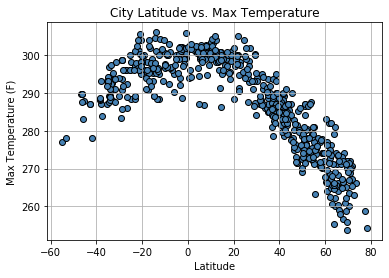

In [93]:
x_values = output_df["Lat"]
y_values = output_df["Max Temp"]
# insert date

plt.scatter(x_values, y_values, c="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("../output_data/max_temp.png")
plt.show()


#### Latitude vs. Humidity Plot

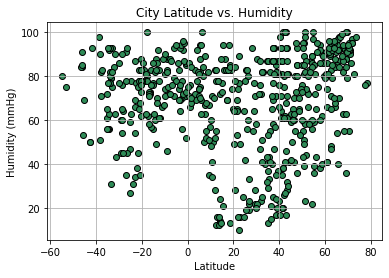

In [94]:
x_values = output_df["Lat"]
y_values = output_df["Humidity"]

plt.scatter(x_values, y_values, c="seagreen", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (mmHg)")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.savefig("../output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

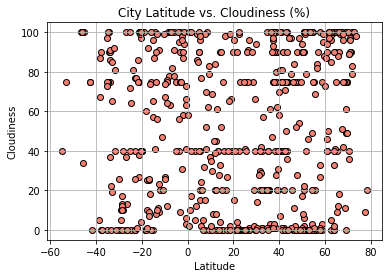

In [95]:
x_values = output_df["Lat"]
y_values = output_df["Cloudiness"]

plt.scatter(x_values, y_values, c="salmon", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

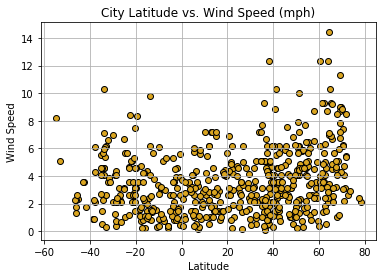

In [96]:
x_values = output_df["Lat"]
y_values = output_df["Wind Speed"]

plt.scatter(x_values, y_values, c="goldenrod", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/wind_speed.png")
plt.show()

## Linear Regression

* Your second requirement is to run linear regression on each relationship, only this time separating them into
* Northern Hemisphere (greater than or equal to 0 degrees latitude)
* Southern Hemisphere (less than 0 degrees latitude)

In [87]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath):
    plt.scatter(x_values, y_values, c=c, edgecolors="black")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_loc,fontsize=13,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.grid()
    plt.savefig(png_filepath)
    plt.show()


In [88]:
# Northern Hemisphere dataframe
north_df = output_df[output_df["Lat"] >= 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Bilibino,42,RU,1586138780,82,68.05,166.44,256.73,1.06
3,Provideniya,100,RU,1586138781,66,64.38,-173.30,262.15,7.00
4,Hilo,90,US,1586138642,65,19.73,-155.09,299.15,5.70
5,Albuquerque,40,US,1586138255,13,35.08,-106.65,293.71,7.70
6,Shingū,20,JP,1586138785,40,33.73,135.98,286.15,7.20
...,...,...,...,...,...,...,...,...,...
565,Novoagansk,100,RU,1586139435,96,61.94,76.66,274.88,4.84
566,Kiryat Gat,40,IL,1586139436,87,31.61,34.76,289.15,2.10
567,Arrondissement de Saint-Denis,0,FR,1586139437,53,48.92,2.33,286.15,3.70
569,Cimarron Hills,20,US,1586139439,20,38.86,-104.70,290.15,5.10


In [89]:
# Southern Hemisphere Dataframe
south_df = output_df[output_df["Lat"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,AU,1586138776,78,-24.87,113.63,298.15,5.70
1,Arraial do Cabo,77,BR,1586138779,69,-22.97,-42.03,297.28,3.58
7,Cap Malheureux,40,MU,1586138786,83,-19.98,57.61,298.15,3.10
10,Palu,41,ID,1586138789,52,-0.89,119.87,305.96,0.84
11,Te Anau,100,NZ,1586138790,69,-45.42,167.72,287.98,2.31
...,...,...,...,...,...,...,...,...,...
552,Campo Verde,4,BR,1586139419,73,-20.42,-54.07,297.15,2.60
556,Menongue,87,AO,1586139424,63,-14.66,17.69,289.18,1.09
557,Alberdi,85,AR,1586139425,82,-32.89,-60.69,295.37,0.33
562,Poum,100,NC,1586139243,76,-20.23,164.02,299.93,7.51


In [90]:
# Checking total rows
len(north_df) + len(south_df)

571

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.92


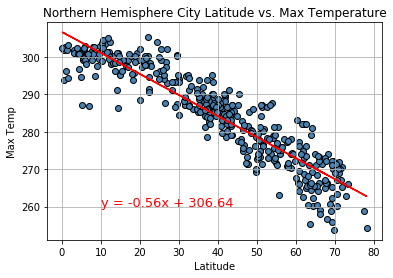

In [97]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
c = "steelblue"
ylabel = "Max Temp"
title = "Northern Hemisphere City Latitude vs. Max Temperature"
line_loc = (10,260)
png_filepath = "../output_data/north_maxtemp.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.65


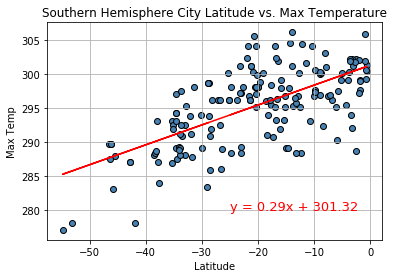

In [98]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
c = "steelblue"
ylabel = "Max Temp"
title = "Southern Hemisphere City Latitude vs. Max Temperature"
line_loc = (-25,280)
png_filepath = "../output_data/south_maxtemp.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27


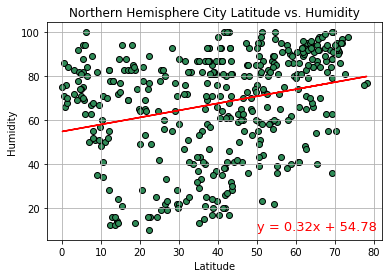

In [99]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
c = "seagreen"
ylabel = "Humidity"
title = "Northern Hemisphere City Latitude vs. Humidity"
line_loc = (50,10)
png_filepath = "../output_data/north_humidity.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


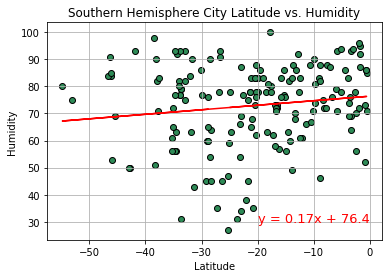

In [100]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
c = "seagreen"
ylabel = "Humidity"
title = "Southern Hemisphere City Latitude vs. Humidity"
line_loc = (-20,30)
png_filepath = "../output_data/south_humidity.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.21


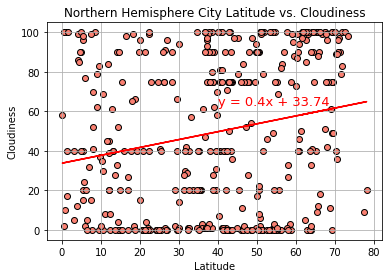

In [101]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
c = "salmon"
ylabel = "Cloudiness"
title = "Northern Hemisphere City Latitude vs. Cloudiness"
line_loc = (40,63)
png_filepath = "../output_data/north_cloudiness.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06


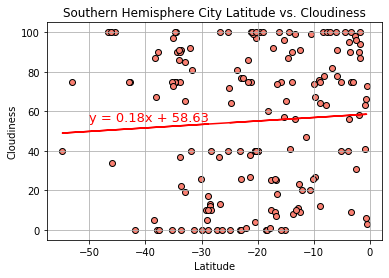

In [102]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
c = "salmon"
ylabel = "Cloudiness"
title = "Southern Hemisphere City Latitude vs. Cloudiness"
line_loc = (-50,55)
png_filepath = "../output_data/south_cloudiness.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.29


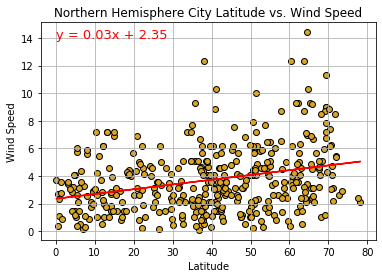

In [103]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
c = "goldenrod"
ylabel = "Wind Speed"
title = "Northern Hemisphere City Latitude vs. Wind Speed"
line_loc = (0,14)
png_filepath = "../output_data/north_windspeed.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.24


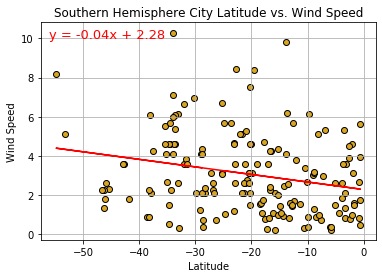

In [104]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
c = "goldenrod"
ylabel = "Wind Speed"
title = "Southern Hemisphere City Latitude vs. Wind Speed"
line_loc = (-56,10)
png_filepath = "../output_data/south_windspeed.png"

scatter_plot(x_values, y_values, c, ylabel, title, line_loc, png_filepath)